### Problem Statement: Regression Sydney Dataset.

#### Key points to covered:

#### • Determine which features are continuous vs. categorical. Drop rows without a valid sales price.

#### • Visualize the univariate distribution of each continuous variable, and the distribution of the target.

#### • Visualize the dependency of the target on each continuous feature (2d scatter plot).

#### • Split the data in training and testing set. Use ColumnTransformer to encode categorical variables. 

#### • Impute missing values using SimpleImputer. 

#### • Evaluate Linear Regression (OLS), Ridge, Lasso and Elasticnet using crossvalidation with the default parameter


## Importing libraries

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
SydneyHousingData = pd.read_csv("../data/Sydney_house_data.csv")

In [ ]:
SydneyHousingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
SydneyHousingData.shape

(4600, 18)

## Data Description for data.csv and output.csv
- Total Records = 4600
- Total number of Features = 18
- Data Types:
    - Integer - 8
    - Float - 4
    - Object - 5

In [ ]:
SydneyHousingData.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
SydneyHousingData.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [ ]:
SydneyHousingData.describe(include = "all")

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN


## Checking for Missing Values 

In [ ]:
SydneyHousingData.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

## Encoding the Categorical data for city

In [ ]:
# Reading all the unique values present in the city column for creating dictionary 
SydneyHousingData.city.unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [ ]:
SydneyHousingData['city']=SydneyHousingData['city'].apply({'Shoreline':0,'Seattle':1,'Kent':2,'Bellevue':3,'Redmond':4,'Maple Valley':5,'North Bend':6,'Lake Forest Park':7,
                                 'Sammamish':8,'Auburn':9,'Des Moines':10,'Bothell':11,'Federal Way':12,'Kirkland':13,'Issaquah':14,
                                 'Woodinville':15,'Normandy Park':16,'Fall City':17,'Renton':18,'Carnation':19,'Snoqualmie':20,
                                 'Duvall':21,'Burien':22,'Covington':23,'Inglewood-Finn Hill':24,'Kenmore':25,'Newcastle':26,'Mercer Island':27,
                                 'Black Diamond':28,'Ravensdale':29,'Clyde Hill':30,'Algona':31,'Skykomish':32,'Tukwila':33,'Vashon':34,
                                 'Yarrow Point':35,'SeaTac':36,'Medina':37,'Enumclaw':38,'Snoqualmie Pass':39,'Pacific':40,'Beaux Arts Village':41,
                                'Preston':42,'Milton':43}.get)

In [ ]:
SydneyHousingData.city.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43], dtype=int64)

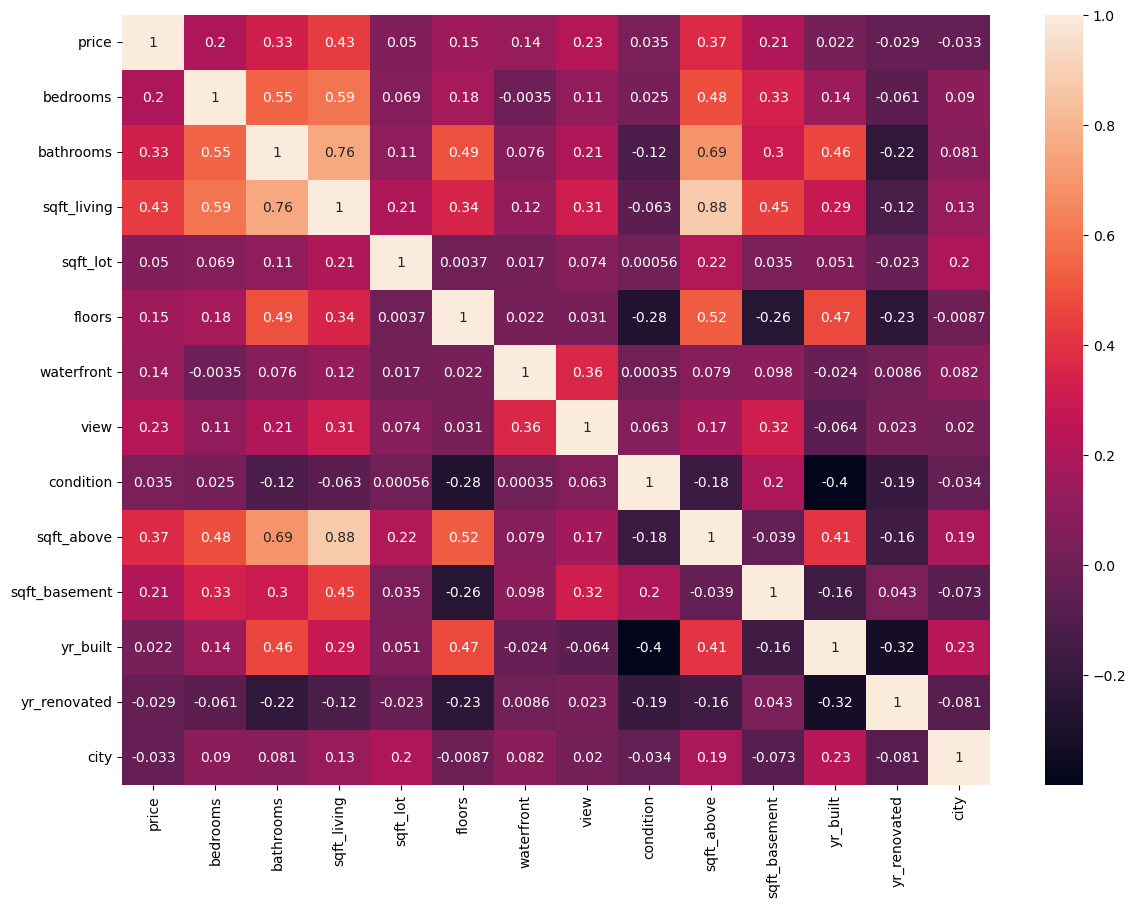

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(SydneyHousingData.corr(),annot=True);

## Dropping non essential Features and segregate dependent and independent variables

In [ ]:
SydneyHousingUnscaled_y = SydneyHousingData['price']
SydneyHousingUnscaled_x = SydneyHousingData.drop(['date', 'country','street','statezip','price'], axis = 1)

## Hist and Box plots for the continuous variables

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'city']


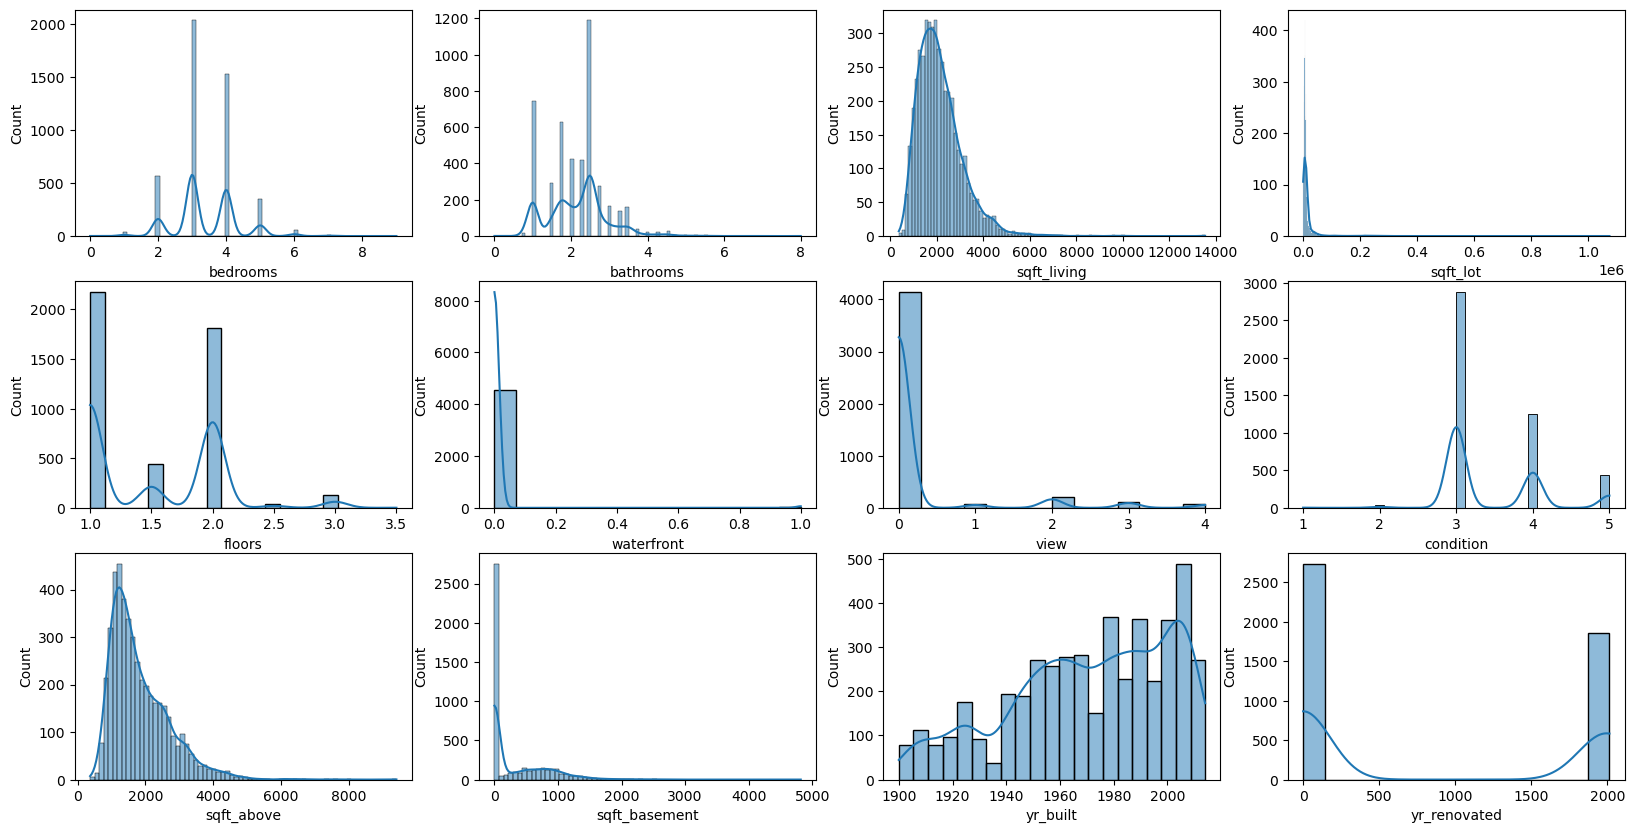

In [ ]:
fig, ax = plt.subplots(3,4, figsize=(20,10))
Features = [col for col in SydneyHousingUnscaled_x.columns if SydneyHousingUnscaled_x[col].dtype in ['float64','int64']]
print(Features)
c = 0
for i in range(3):
    for j in range(4):
        sns.histplot(ax = ax[i][j], x = SydneyHousingUnscaled_x[Features[c]], kde =True)
        c += 1

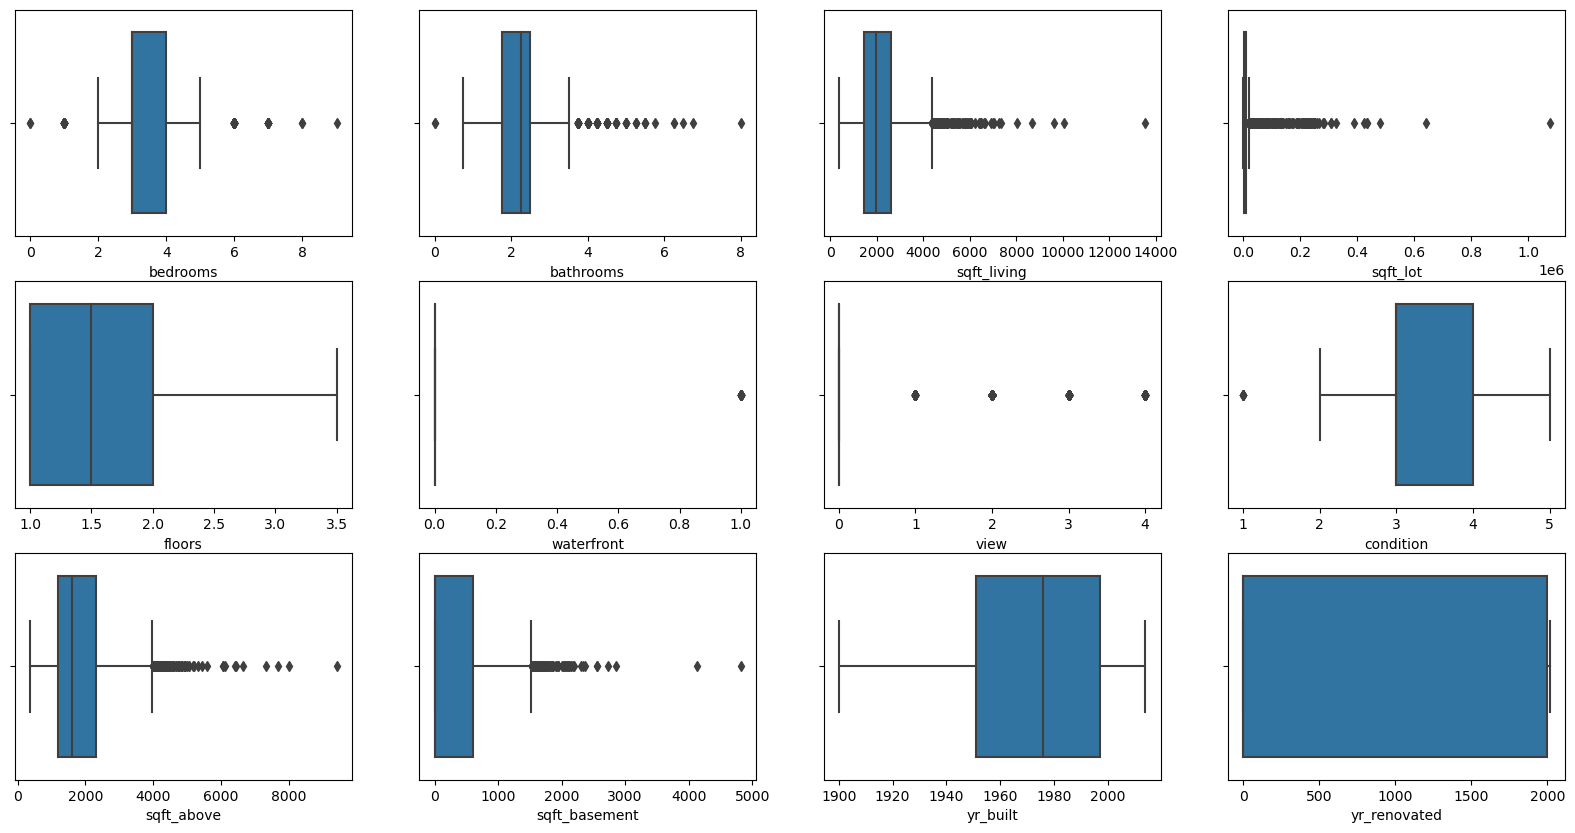

In [ ]:
fig, ax = plt.subplots(3,4, figsize=(20,10))
c = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(ax = ax[i][j], x = SydneyHousingData[Features[c]])
        c += 1

## We can see that the distribution of many features is highly saturated at certain points and many require scaling

## Using the Standard Scaler functionality for scaling the Features between -1 to 1

In [ ]:
from sklearn.preprocessing import StandardScaler
autoscaler = StandardScaler()
SydneyHousingDataScaled_x = pd.DataFrame(autoscaler.fit_transform(SydneyHousingUnscaled_x),columns = SydneyHousingUnscaled_x.columns)
SydneyHousingDataScaled_x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,-0.932857
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,-0.823706
2,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,-0.714556
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,-0.605405
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,-0.496255


In [ ]:
SydneyHousingDataScaled_x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,-0.932857
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,-0.823706
2,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,-0.714556
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,-0.605405
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,-0.496255


In [ ]:
SydneyHousingDataScaled_x.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
count,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03
mean,8.773175e-18,-1.641682e-16,-9.287257e-17,1.713002e-17,4.235984e-16,2.469583e-16,1.925272e-16,5.299625e-16,-7.018540e-17,4.425446e-16,3.273855e-15,1.780218e-16,1.362678e-16
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00
min,-3.742363e+00,-2.757211e+00,-1.837133e+00,-3.961623e-01,-9.513876e-01,-8.500441e-02,-3.091943e-01,-3.620641e+00,-1.690416e+00,-6.724637e-01,-2.381083e+00,-8.256934e-01,-9.328569e-01
25%,-4.411223e-01,-5.242023e-01,-7.053737e-01,-2.745713e-01,-9.513876e-01,-8.500441e-02,-3.091943e-01,-6.671122e-01,-7.392225e-01,-6.724637e-01,-6.655643e-01,-8.256934e-01,-8.237064e-01
50%,-4.411223e-01,1.138002e-01,-1.654518e-01,-1.998163e-01,-2.241648e-02,-8.500441e-02,-3.091943e-01,-6.671122e-01,-2.752259e-01,-6.724637e-01,1.753763e-01,-8.256934e-01,-4.962550e-01
75%,6.592912e-01,4.328015e-01,4.990675e-01,-1.073358e-01,9.065546e-01,-8.500441e-02,-3.091943e-01,8.096521e-01,5.483681e-01,6.419456e-01,8.817664e-01,1.215544e+00,5.952497e-01
max,6.161359e+00,7.450830e+00,1.183743e+01,2.952480e+01,3.693468e+00,1.176410e+01,4.830079e+00,2.286416e+00,8.795908e+00,9.713525e+00,1.453606e+00,1.230861e+00,3.760613e+00


In [ ]:
SydneyHousingUnscaled_y.head()

0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64

In [ ]:
SydneyHousingUnscaled_y.describe()

count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

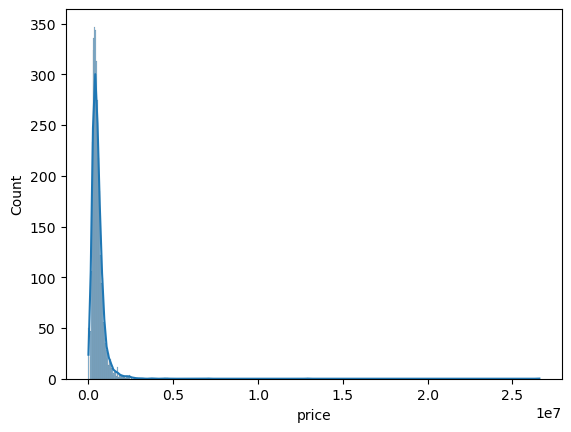

In [ ]:
sns.histplot(x = SydneyHousingUnscaled_y, kde =True)

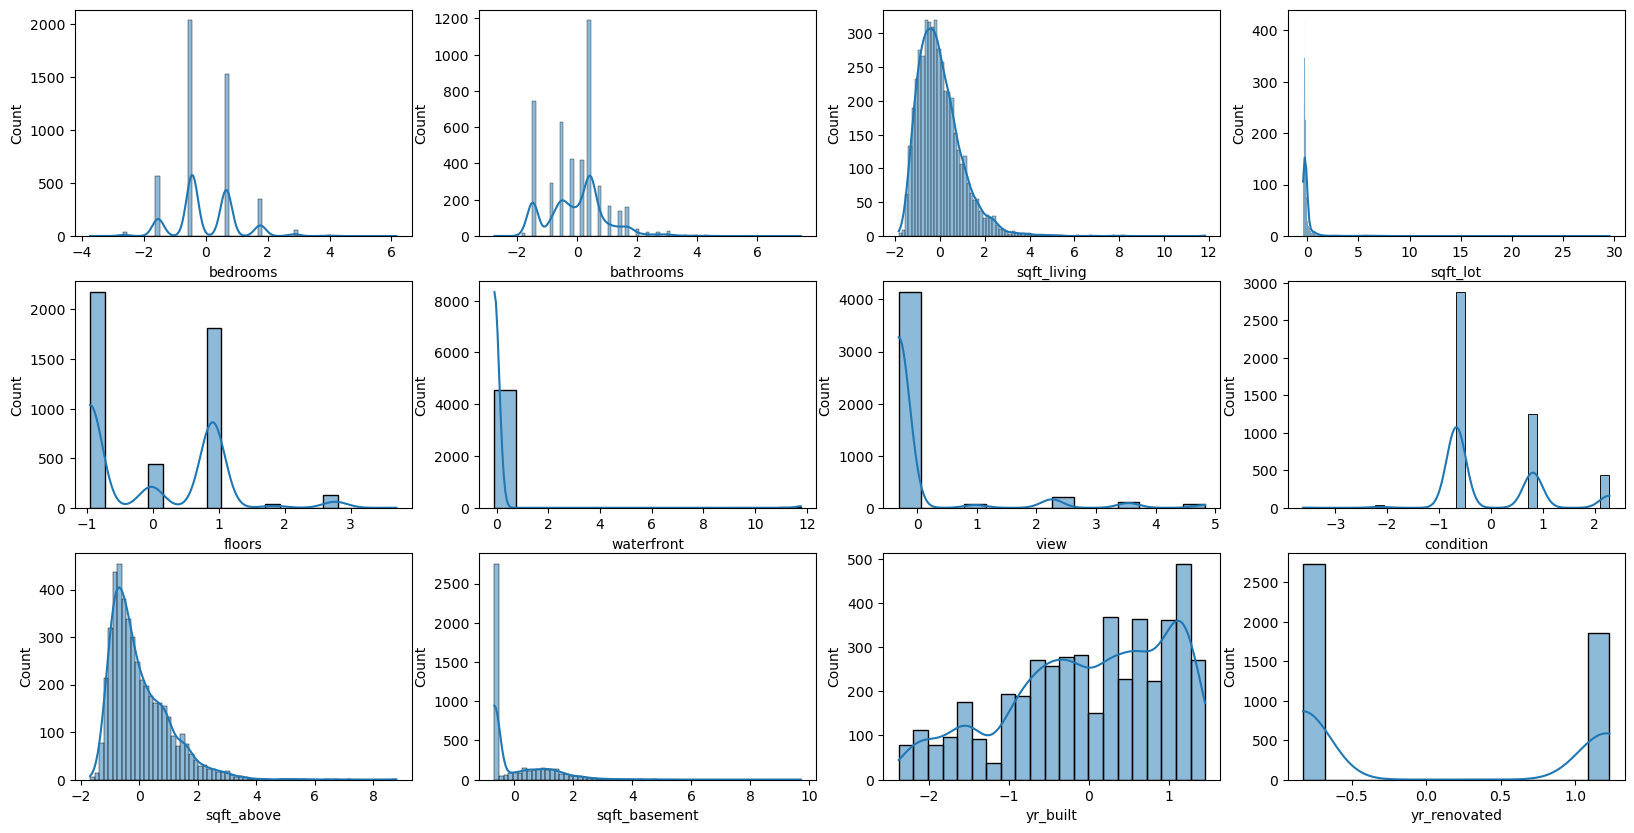

In [ ]:
fig, ax = plt.subplots(3,4, figsize=(20,10))
c = 0
for i in range(3):
    for j in range(4):
        sns.histplot(ax = ax[i][j], x = SydneyHousingDataScaled_x[Features[c]], kde =True)
        c += 1
        

## Box plots to look for any changes in dataset due to scaling

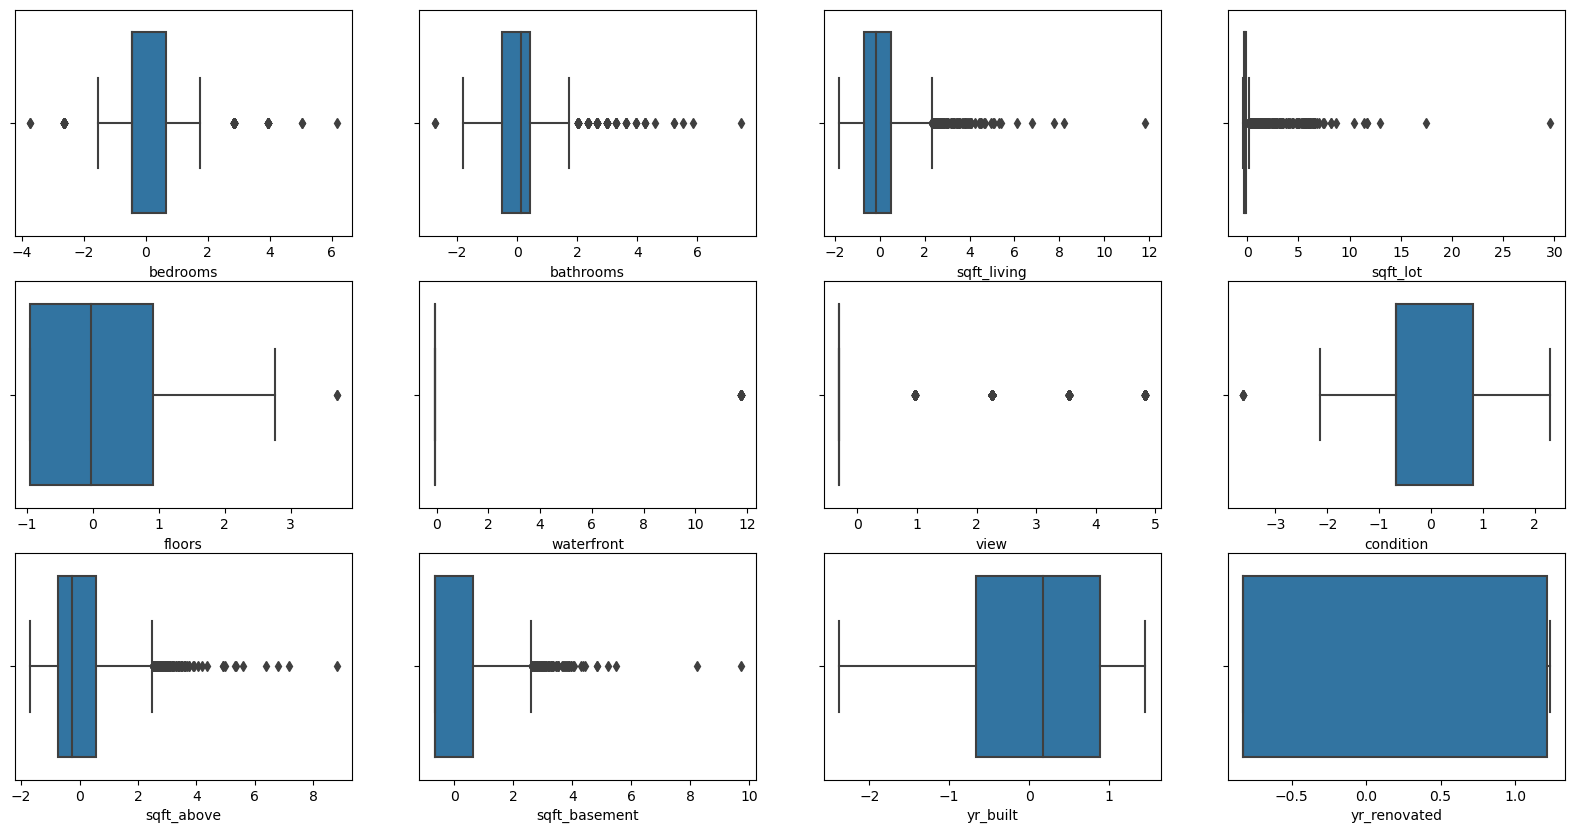

In [ ]:
fig, ax = plt.subplots(3,4, figsize=(20,10))
c = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(ax = ax[i][j], x = SydneyHousingDataScaled_x[Features[c]])
        c += 1

In [ ]:
SydneyHousingDataScaled_x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city'],
      dtype='object')

## Dependency analysis of the Target variables wrt all continuos variables using scatter plot

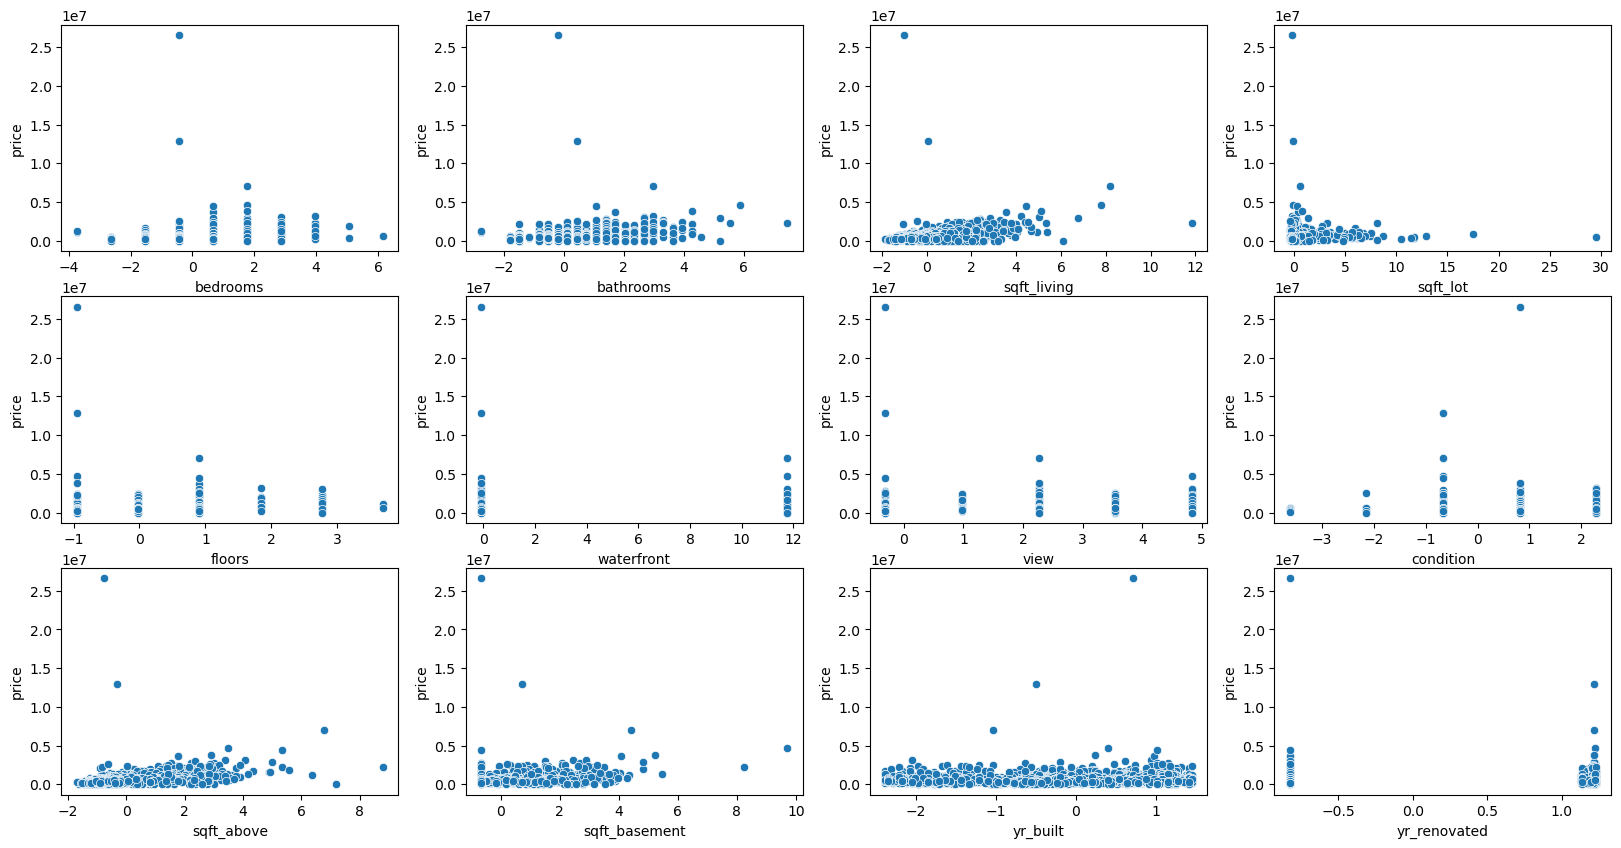

In [ ]:
fig, ax = plt.subplots(3,4, figsize=(20,10))
c = 0
for i in range(3):
    for j in range(4):
        sns.scatterplot(ax = ax[i][j], x = SydneyHousingDataScaled_x[Features[c]], y = SydneyHousingUnscaled_y)
        c += 1

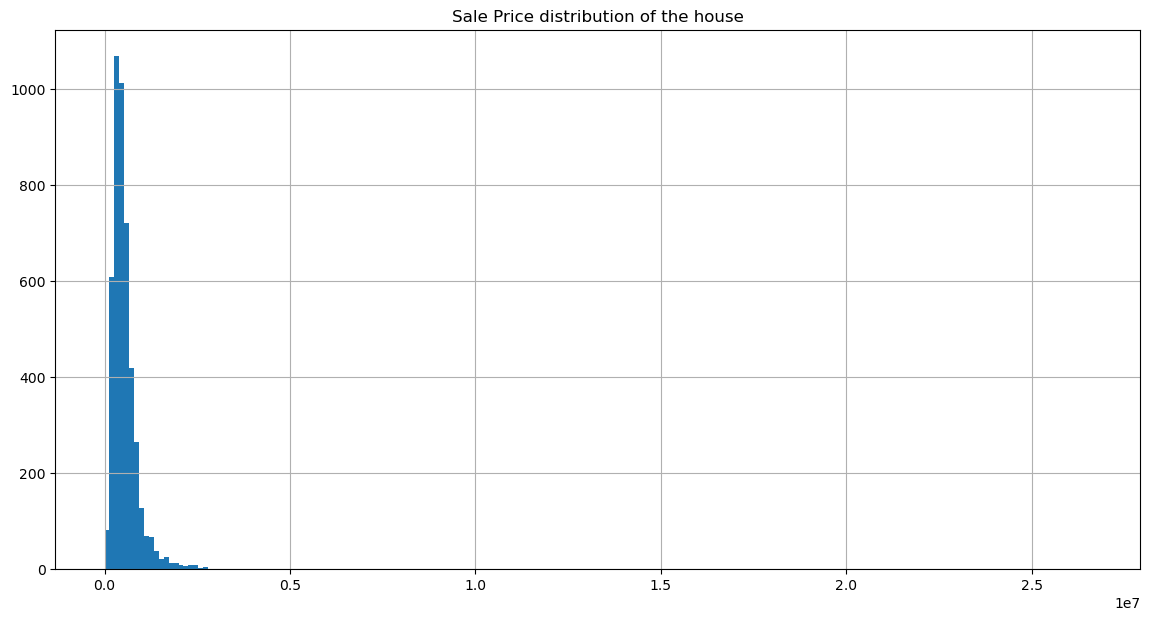

In [ ]:
plt.title("Sale Price distribution of the house")
SydneyHousingUnscaled_y.hist(bins=200, figsize=(14,7))
plt.show()

## Pre Processing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
# Create training and validation sets
X_train,X_test,y_train,y_test = train_test_split(SydneyHousingDataScaled_x,
                                                                     SydneyHousingUnscaled_y,
                                                                     test_size=0.25,
                                                                     random_state=42)

## Regression Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [ ]:
#applying fit to the Linear Regression (OLS) model
OlsMod = LinearRegression()

OlsMod.fit(X_train, y_train)
predicted = OlsMod.predict(X_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')
print(f'OlsMod score = {OlsMod.score(X_train,y_train)*100}')
scores = cross_val_score(OlsMod, X_train, y_train, scoring='r2', cv=5)
print(f'cross val scores = {np.mean(scores)*100}')

Root Mean Square Error test = 895657.9002465506
OlsMod score = 55.57041880326432
cross val scores = 54.38799050496706


In [ ]:
#applying fit to the Ridge Regression model
RidgeMod = Ridge()

RidgeMod.fit(X_train, y_train)
predicted = RidgeMod.predict(X_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')
print(f'RidgeMod score = {RidgeMod.score(X_train,y_train)*100}')
scores = cross_val_score(RidgeMod, X_train, y_train, scoring='r2', cv=5)
print(f'cross val scores = {np.mean(scores)*100}')

Root Mean Square Error test = 895650.6410421253
RidgeMod score = 55.570414057919294
cross val scores = 54.389885466444646


In [ ]:
#applying fit to the Linear Regression model
LassoMod = Lasso()

LassoMod.fit(X_train, y_train)
predicted = LassoMod.predict(X_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')
print(f'LassoMod score = {LassoMod.score(X_train,y_train)*100}')
scores = cross_val_score(LassoMod, X_train, y_train, scoring='r2', cv=5)
print(f'cross val scores = {np.mean(scores)*100}')

Root Mean Square Error test = 895658.1550855321
LassoMod score = 55.5704187872609
cross val scores = 54.387982974506855


D:\CodingSW\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.359e+12, tolerance: 4.927e+10
  model = cd_fast.enet_coordinate_descent(
D:\CodingSW\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.615e+12, tolerance: 4.161e+10
  model = cd_fast.enet_coordinate_descent(
D:\CodingSW\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.973e+11, tolerance: 3.765e+10

In [ ]:
#applying fit to the Elasticnet model
ElasticnetMod = ElasticNet()

ElasticnetMod.fit(X_train, y_train)
predicted = ElasticnetMod.predict(X_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')
print(f'ElasticnetMod score = {ElasticnetMod.score(X_train,y_train)*100}')
scores = cross_val_score(ElasticnetMod, X_train, y_train, scoring='r2', cv=5)
print(f'cross val scores = {np.mean(scores)*100}')

Root Mean Square Error test = 892389.5015809392
ElasticnetMod score = 51.78579798281716
cross val scores = 51.552219529947266


In [ ]:
#New Datapoint for prediction
NewInstance={'bedrooms':3.0,'bathrooms':1.5,'sqft_living':1230,'sqft_lot':4500,'floors':1.0,'waterfront':1,'view':3,'condition':5,
          'sqft_above':0,'sqft_basement':500,'yr_built':2000,'yr_renovated':0,'city':5}
NewInstance_data=pd.DataFrame(NewInstance,[1])

In [ ]:
#Pricing allocated
# Here the linearmodel is the variable  used in 13
NewInstance_data_price=OlsMod.predict(NewInstance_data)
ClosestP = np.round(NewInstance_data_price, 2)
print(f" The predicted price for the given data by OlsMod is :{ClosestP}")
NewInstance_data_price=RidgeMod.predict(NewInstance_data)
ClosestP = np.round(NewInstance_data_price, 2)
print(f" The predicted price for the given data by RidgeMod is :{ClosestP}")
NewInstance_data_price=LassoMod.predict(NewInstance_data)
ClosestP = np.round(NewInstance_data_price, 2)
print(f" The predicted price for the given data by LassoMod is :{ClosestP}")
NewInstance_data_price=ElasticnetMod.predict(NewInstance_data)
ClosestP = np.round(NewInstance_data_price, 2)
print(f" The predicted price for the given data by OlsMod is :{ClosestP}")

 The predicted price for the given data by OlsMod is :[7643633.19]
 The predicted price for the given data by RidgeMod is :[7695531.18]
 The predicted price for the given data by LassoMod is :[1.62575213e+08]
 The predicted price for the given data by OlsMod is :[55392007.46]
